
### Imran Sarwar 46588833 Assignment 2
# Deep Learning for Image Classification


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading CSVs into dataframes
train_df = pd.read_csv('train.csv')
devtest_df = pd.read_csv('devtest.csv')
test_df = pd.read_csv('test.csv')

### 1.1 Exploration
Displaying one image from each partition set and class, as well as its dimensions.

Training Dataset Images
Paper Image Dimensions (300, 300, 3)
Scissors Image Dimensions (300, 300, 3)
Rock Image Dimensions (300, 300, 3)


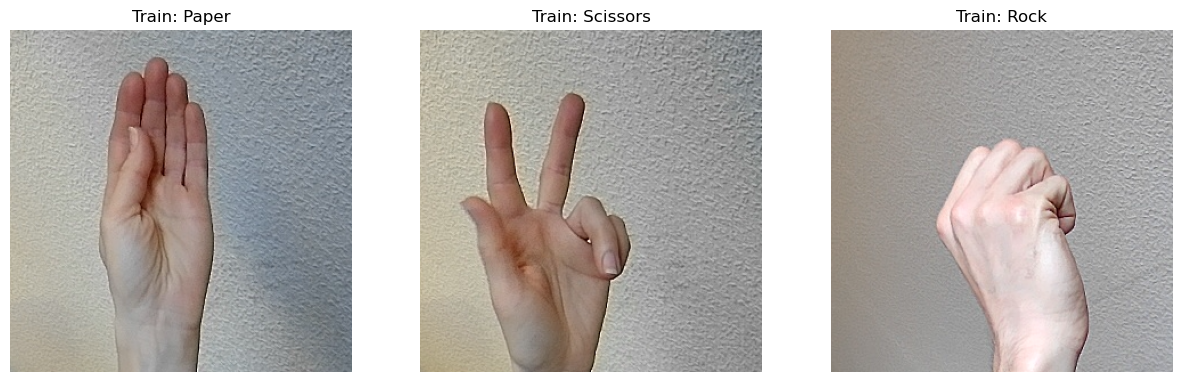

In [3]:
# Retrieving Paper Image
paper_train_df = train_df[train_df['label']=='paper']               # Separating all paper images into its own dataframe
train_paper_path = paper_train_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
train_paper_img = plt.imread(train_paper_path)                      # Reading image path

# Repeat for Rock
rock_train_df = train_df[train_df['label']=='rock']               
train_rock_path = rock_train_df.iloc[0]['path']                   
train_rock_img = plt.imread(train_rock_path)                      

# Repeat for Scissors 
scissors_train_df = train_df[train_df['label']=='scissors']               
train_scissors_path = scissors_train_df.iloc[0]['path']                   
train_scissors_img = plt.imread(train_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(train_paper_img)
axes[0].set_title('Train: Paper')
axes[0].axis('off')  

axes[1].imshow(train_scissors_img)
axes[1].set_title('Train: Scissors')
axes[1].axis('off')

axes[2].imshow(train_rock_img)
axes[2].set_title('Train: Rock')
axes[2].axis('off')
print("Training Dataset Images")
print("Paper Image Dimensions", train_paper_img.shape)
print("Scissors Image Dimensions", train_scissors_img.shape)
print("Rock Image Dimensions", train_rock_img.shape)

Test Dataset Images
Paper Image Dimensions (300, 300, 3)
Scissors Image Dimensions (300, 300, 3)
Rock Image Dimensions (300, 300, 3)


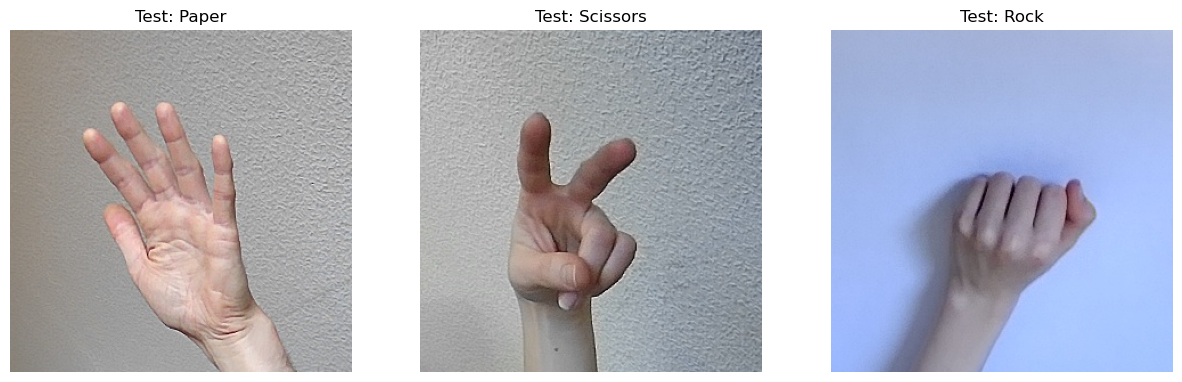

In [4]:
# Retrieving Paper Image
paper_test_df = test_df[test_df['label']=='paper']               # Separating all paper images into its own dataframe
test_paper_path = paper_test_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
test_paper_img = plt.imread(test_paper_path)                      # Reading image path

# Repeat for Rock
rock_test_df = test_df[test_df['label']=='rock']               
test_rock_path = rock_test_df.iloc[0]['path']                   
test_rock_img = plt.imread(test_rock_path)                      

# Repeat for Scissors 
scissors_test_df = test_df[test_df['label']=='scissors']               
test_scissors_path = scissors_test_df.iloc[0]['path']                   
test_scissors_img = plt.imread(test_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(test_paper_img)
axes[0].set_title('Test: Paper')
axes[0].axis('off')  

axes[1].imshow(test_scissors_img)
axes[1].set_title('Test: Scissors')
axes[1].axis('off')

axes[2].imshow(test_rock_img)
axes[2].set_title('Test: Rock')
axes[2].axis('off')
print("Test Dataset Images")
print("Paper Image Dimensions", test_paper_img.shape)
print("Scissors Image Dimensions", test_scissors_img.shape)
print("Rock Image Dimensions", test_rock_img.shape)

Devtest Dataset Images
Paper Image Dimensions (300, 300, 3)
Scissors Image Dimensions (300, 300, 3)
Rock Image Dimensions (300, 300, 3)


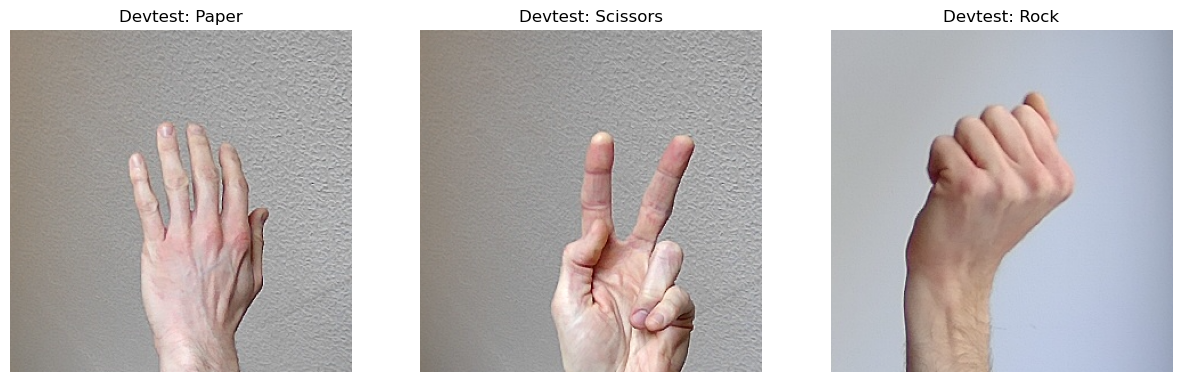

In [5]:
# Retrieving Paper Image
paper_devtest_df = devtest_df[devtest_df['label']=='paper']               # Separating all paper images into its own dataframe
devtest_paper_path = paper_devtest_df.iloc[0]['path']                   # Retrieving the path of the first image in the dataframe
devtest_paper_img = plt.imread(devtest_paper_path)                      # Reading image path

# Repeat for Rock
rock_devtest_df = devtest_df[devtest_df['label']=='rock']               
devtest_rock_path = rock_devtest_df.iloc[0]['path']                   
devtest_rock_img = plt.imread(devtest_rock_path)                      

# Repeat for Scissors 
scissors_devtest_df = devtest_df[devtest_df['label']=='scissors']               
devtest_scissors_path = scissors_devtest_df.iloc[0]['path']                   
devtest_scissors_img = plt.imread(devtest_scissors_path)                                         

#Displaying images side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(devtest_paper_img)
axes[0].set_title('Devtest: Paper')
axes[0].axis('off')  

axes[1].imshow(devtest_scissors_img)
axes[1].set_title('Devtest: Scissors')
axes[1].axis('off')

axes[2].imshow(devtest_rock_img)
axes[2].set_title('Devtest: Rock')
axes[2].axis('off')
print("Devtest Dataset Images")
print("Paper Image Dimensions", devtest_paper_img.shape)
print("Scissors Image Dimensions", devtest_scissors_img.shape)
print("Rock Image Dimensions", devtest_rock_img.shape)

Number of Images by Class and Partition

In [7]:
print("Train - Paper Number of Images:", paper_train_df.shape[0])
print("Train - Scissors Number of Images:", scissors_train_df.shape[0])
print("Train - Rock Number of Images:", rock_train_df.shape[0])
print("Test - Paper Number of Images:", paper_test_df.shape[0])
print("Test - Scissors Number of Images:", scissors_test_df.shape[0])
print("Test - Rock Number of Images:", rock_test_df.shape[0])
print("Devtest - Paper Number of Images:", paper_devtest_df.shape[0])
print("Devtest - Scissors Number of Images:", scissors_devtest_df.shape[0])
print("Devtest - Rock Number of Images:", rock_devtest_df.shape[0])

Train - Paper Number of Images: 544
Train - Scissors Number of Images: 541
Train - Rock Number of Images: 544
Test - Paper Number of Images: 182
Test - Scissors Number of Images: 182
Test - Rock Number of Images: 182
Devtest - Paper Number of Images: 181
Devtest - Scissors Number of Images: 180
Devtest - Rock Number of Images: 181


### 1.2 Dataset and Dataloader Preparation

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import cv2
device = "cuda" if torch.cuda.is_available() else "cpu"
print("The device is", device)

# Define Dataset Class
class ImageDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data = pd.read_csv(csv_file)
        self.transform = transform
        self.label_map = {'rock': 0, 'paper': 1, 'scissors': 2}     # Map string to int

    def __len__(self):
        return len(self.data)

    def __getitem__(self, ix):
        img = cv2.imread(self.data.iloc[ix, 0])  # BGR
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Now it's RGB
        img = cv2.resize(img, (100, 100))
        img = torch.tensor(img).float().permute(2, 0, 1) / 255  

        label_str = self.data.iloc[ix, 1]
        label = self.label_map[label_str]  # convert to int label

        return torch.tensor(img).to(device).float(), \
           torch.tensor(label).long().to(device)

# Define Dataloaders

train_loader = DataLoader(ImageDataset('train.csv'),batch_size=32,shuffle=True)
test_loader = DataLoader(ImageDataset('test.csv'), batch_size=32, shuffle=False)
devtest_loader = DataLoader(ImageDataset('devtest.csv'), batch_size=32, shuffle=False)

The device is cpu


## Task 2 - Classification
### Task 2.1 Using ConvNets

Defining PyTorch Convolutional Neural Network Model

**Justification of Inputs:**

Layers: 2 convolutional blocks (for feature extraction);
1 fully connected block (the first linear layer + ReLU);
1 output layer (the final linear layer)

Kernel Size: 3×3 convolution kernel - standard/common choice for kernel size in machine learning algorithms.

Padding = 1 - to maintain spatial dimensions and prevent shrinking.

ReLU activation - enables the network to learn non-linear decision boundaries from the detected features.

Pooling size of 2 after each layer for downsampling/reducing each spatial dimension by half.

Flatten() - converts the 3D feature maps (32×25×25) into a 1D vector for the linear layers.

Linear(32x25x25) due to 100x100 image being halved twice (100>50>25). 

Linear(128x3) due to final output being 3 classes. 


In [28]:
import torch.nn as nn

model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3, padding=1),           # First convolutional block
    nn.ReLU(),
    nn.MaxPool2d(2),

    nn.Conv2d(16,32,kernel_size=3, padding=1),          # Second convolutional block
    nn.ReLU(),
    nn.MaxPool2d(2),


    nn.Flatten(),                                       #Flattening from 3D to 1D
    nn.Linear(32*25*25,128),                            # Fully connected block
    nn.ReLU(),
    nn.Linear(128,3)                                    # Output layer
    ).to(device)


Summary of Model

In [29]:
from torchsummary import summary
summary(model, (3,100,100))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 100, 100]        448
├─ReLU: 1-2                              [-1, 16, 100, 100]        --
├─MaxPool2d: 1-3                         [-1, 16, 50, 50]          --
├─Conv2d: 1-4                            [-1, 32, 50, 50]          4,640
├─ReLU: 1-5                              [-1, 32, 50, 50]          --
├─MaxPool2d: 1-6                         [-1, 32, 25, 25]          --
├─Flatten: 1-7                           [-1, 20000]               --
├─Linear: 1-8                            [-1, 128]                 2,560,128
├─ReLU: 1-9                              [-1, 128]                 --
├─Linear: 1-10                           [-1, 3]                   387
Total params: 2,565,603
Trainable params: 2,565,603
Non-trainable params: 0
Total mult-adds (M): 18.40
Input size (MB): 0.11
Forward/backward pass size (MB): 1.83
Params size (MB): 9.79
Estimated Total Size (MB): 

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 16, 100, 100]        448
├─ReLU: 1-2                              [-1, 16, 100, 100]        --
├─MaxPool2d: 1-3                         [-1, 16, 50, 50]          --
├─Conv2d: 1-4                            [-1, 32, 50, 50]          4,640
├─ReLU: 1-5                              [-1, 32, 50, 50]          --
├─MaxPool2d: 1-6                         [-1, 32, 25, 25]          --
├─Flatten: 1-7                           [-1, 20000]               --
├─Linear: 1-8                            [-1, 128]                 2,560,128
├─ReLU: 1-9                              [-1, 128]                 --
├─Linear: 1-10                           [-1, 3]                   387
Total params: 2,565,603
Trainable params: 2,565,603
Non-trainable params: 0
Total mult-adds (M): 18.40
Input size (MB): 0.11
Forward/backward pass size (MB): 1.83
Params size (MB): 9.79
Estimated Total Size (MB): 

Defining functions required for training.

In [31]:
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim

# Define model, loss function and optimizer
def get_model():
    model = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Conv2d(16, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2),

        nn.Flatten(),
        nn.Linear(32 * 25 * 25, 128),
        nn.ReLU(),
        nn.Linear(128, 3)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)   

    return model, loss_fn, optimizer


# Train one batch
def train_batch(x, y, model, optimizer, loss_fn):
    model.train()
    optimizer.zero_grad()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

# Calculate batch accuracy 
@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

Training over 10 epochs using the training data, and testing against the validation data to determine when to stop training using the generated plot. 

Epoch: 1


  0%|          | 0/51 [00:00<?, ?it/s]/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_36207/3196104472.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \
100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


  Train accuracy: 0.36 | Devtest accuracy: 0.413
Epoch: 2


100%|██████████| 51/51 [00:24<00:00,  2.05it/s]


  Train accuracy: 0.664 | Devtest accuracy: 0.714
Epoch: 3


100%|██████████| 51/51 [00:24<00:00,  2.08it/s]


  Train accuracy: 0.777 | Devtest accuracy: 0.76
Epoch: 4


100%|██████████| 51/51 [00:26<00:00,  1.96it/s]


  Train accuracy: 0.857 | Devtest accuracy: 0.804
Epoch: 5


100%|██████████| 51/51 [00:27<00:00,  1.88it/s]


  Train accuracy: 0.896 | Devtest accuracy: 0.891
Epoch: 6


100%|██████████| 51/51 [01:32<00:00,  1.82s/it]


  Train accuracy: 0.926 | Devtest accuracy: 0.9
Epoch: 7


100%|██████████| 51/51 [00:29<00:00,  1.75it/s]


  Train accuracy: 0.946 | Devtest accuracy: 0.902
Epoch: 8


100%|██████████| 51/51 [00:26<00:00,  1.92it/s]


  Train accuracy: 0.957 | Devtest accuracy: 0.919
Epoch: 9


100%|██████████| 51/51 [00:24<00:00,  2.04it/s]


  Train accuracy: 0.982 | Devtest accuracy: 0.934
Epoch: 10


100%|██████████| 51/51 [00:25<00:00,  2.00it/s]


  Train accuracy: 0.991 | Devtest accuracy: 0.939
Epoch: 11


100%|██████████| 51/51 [00:27<00:00,  1.87it/s]


  Train accuracy: 0.994 | Devtest accuracy: 0.923
Epoch: 12


100%|██████████| 51/51 [00:28<00:00,  1.78it/s]


  Train accuracy: 0.997 | Devtest accuracy: 0.948
Epoch: 13


100%|██████████| 51/51 [00:30<00:00,  1.70it/s]


  Train accuracy: 0.999 | Devtest accuracy: 0.934
Epoch: 14


100%|██████████| 51/51 [00:29<00:00,  1.74it/s]


  Train accuracy: 1.0 | Devtest accuracy: 0.948
Epoch: 15


100%|██████████| 51/51 [00:46<00:00,  1.10it/s]


  Train accuracy: 1.0 | Devtest accuracy: 0.935


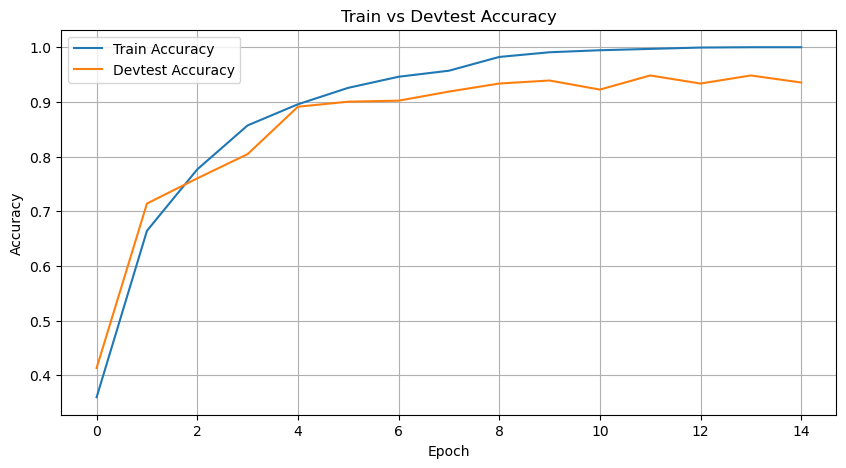

In [36]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# 1. Initialize the model, loss, optimizer, DataLoaders
model, loss_fn, optimizer = get_model()

# 2. Lists to store accuracy/loss per epoch
train_accuracies = []
devtest_accuracies = []
losses = []

# 3. Set number of epochs - variable for trial and error
num_epochs = 15

# 4. Training loop
for epoch in range(num_epochs):
    print("Epoch:", epoch+1)

    epoch_accuracies = []
    epoch_losses = []

    # 5. Train on all batches
    for batch in tqdm(train_loader):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        batch_accuracy = accuracy(x, y, model)
        epoch_losses.append(batch_loss)
        epoch_accuracies.extend(batch_accuracy)

    # 6. Evaluate on devtest set
    devtest_accs = []
    for batch in devtest_loader:
        x, y = batch
        devtest_accs.extend(accuracy(x, y, model))

    # 7. Store mean values
    mean_train_acc = np.mean(epoch_accuracies)
    mean_devtest_acc = np.mean(devtest_accs)
    mean_loss = np.mean(epoch_losses)

    train_accuracies.append(mean_train_acc)
    devtest_accuracies.append(mean_devtest_acc)
    losses.append(mean_loss)

    print(f"  Train accuracy: {round(mean_train_acc, 3)} | Devtest accuracy: {round(mean_devtest_acc, 3)}")

# 8. Plotting training vs devtest accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(devtest_accuracies, label='Devtest Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Devtest Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Based on this plot, we see devtest accuracy peaks at epoch 8 before becoming unstable. After epoch 8, the training accuracy continues to improve whilst devtest accuracy plateaus, which indicates that the model is memorising the data and overfitting. Therefore we will now re-train our final model using only 8 epochs.

In [37]:
model, loss_fn, optimizer = get_model()
accuracies=[]
losses=[]

# Training over 8 epochs
for epoch in range(8):
    print("Epoch:", epoch+1)

    epoch_accuracies = []
    epoch_losses = []

        # Iterate for each batch using tqdm
    for batch in tqdm(train_loader):
        x, y = batch
        # Compute the loss and accuracy
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        batch_accuracy = accuracy(x, y, model)
        epoch_losses.append(batch_loss)
        epoch_accuracies.extend(batch_accuracy)

    # Compute the accuracy of the test set
    test_accuracies = []
    for batch in test_loader:
        x, y = batch
        test_accuracies.extend(accuracy(x, y, model))
    test_accuracy = np.mean(test_accuracies)

    # Store the mean loss and accuracy within an epoch
    epoch_loss = np.mean(epoch_losses)
    epoch_accuracy = np.mean(epoch_accuracies)
    print("  Epoch train loss:", round(epoch_loss,3), "Epoch train accuracy:", round(epoch_accuracy))
    print("  Test accuracy:", round(test_accuracy,3))
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)


Epoch: 1


  0%|          | 0/51 [00:00<?, ?it/s]/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_36207/3196104472.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \


100%|██████████| 51/51 [00:37<00:00,  1.34it/s]


  Epoch train loss: 1.112 Epoch train accuracy: 0
  Test accuracy: 0.333
Epoch: 2


100%|██████████| 51/51 [00:47<00:00,  1.07it/s]


  Epoch train loss: 0.969 Epoch train accuracy: 1
  Test accuracy: 0.676
Epoch: 3


100%|██████████| 51/51 [00:42<00:00,  1.20it/s]


  Epoch train loss: 0.668 Epoch train accuracy: 1
  Test accuracy: 0.78
Epoch: 4


100%|██████████| 51/51 [00:53<00:00,  1.04s/it]


  Epoch train loss: 0.496 Epoch train accuracy: 1
  Test accuracy: 0.802
Epoch: 5


100%|██████████| 51/51 [00:58<00:00,  1.14s/it]


  Epoch train loss: 0.373 Epoch train accuracy: 1
  Test accuracy: 0.78
Epoch: 6


100%|██████████| 51/51 [01:02<00:00,  1.23s/it]


  Epoch train loss: 0.31 Epoch train accuracy: 1
  Test accuracy: 0.894
Epoch: 7


100%|██████████| 51/51 [00:36<00:00,  1.40it/s]


  Epoch train loss: 0.229 Epoch train accuracy: 1
  Test accuracy: 0.879
Epoch: 8


100%|██████████| 51/51 [00:29<00:00,  1.74it/s]


  Epoch train loss: 0.191 Epoch train accuracy: 1
  Test accuracy: 0.881


## Task 2.2 Using Pre-Trained Models


/Users/imransarwar/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/imransarwar/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /Users/imransarwar/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:02<00:00, 6.56MB/s]


Epoch: 0


  0%|          | 0/51 [00:00<?, ?it/s]/var/folders/x6/jtpfwgc93tdgdrwfww3lt0q40000gr/T/ipykernel_36207/3196104472.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(img).to(device).float(), \
100%|██████████| 51/51 [00:56<00:00,  1.11s/it]


  Train accuracy: 0.748 | Devtest accuracy: 0.919 | Loss: 0.6094
Epoch: 1


100%|██████████| 51/51 [01:03<00:00,  1.24s/it]


  Train accuracy: 0.935 | Devtest accuracy: 0.946 | Loss: 0.3228
Epoch: 2


100%|██████████| 51/51 [00:56<00:00,  1.11s/it]


  Train accuracy: 0.953 | Devtest accuracy: 0.946 | Loss: 0.259
Epoch: 3


100%|██████████| 51/51 [00:57<00:00,  1.13s/it]


  Train accuracy: 0.957 | Devtest accuracy: 0.961 | Loss: 0.225
Epoch: 4


100%|██████████| 51/51 [01:03<00:00,  1.24s/it]


  Train accuracy: 0.971 | Devtest accuracy: 0.963 | Loss: 0.1992
Epoch: 5


100%|██████████| 51/51 [00:54<00:00,  1.07s/it]


  Train accuracy: 0.975 | Devtest accuracy: 0.961 | Loss: 0.1829
Epoch: 6


100%|██████████| 51/51 [01:22<00:00,  1.61s/it]


  Train accuracy: 0.975 | Devtest accuracy: 0.961 | Loss: 0.1859
Epoch: 7


100%|██████████| 51/51 [00:58<00:00,  1.14s/it]


  Train accuracy: 0.977 | Devtest accuracy: 0.965 | Loss: 0.1595
Epoch: 8


100%|██████████| 51/51 [01:44<00:00,  2.05s/it]


  Train accuracy: 0.973 | Devtest accuracy: 0.967 | Loss: 0.1625
Epoch: 9


100%|██████████| 51/51 [01:06<00:00,  1.31s/it]


  Train accuracy: 0.979 | Devtest accuracy: 0.961 | Loss: 0.1402


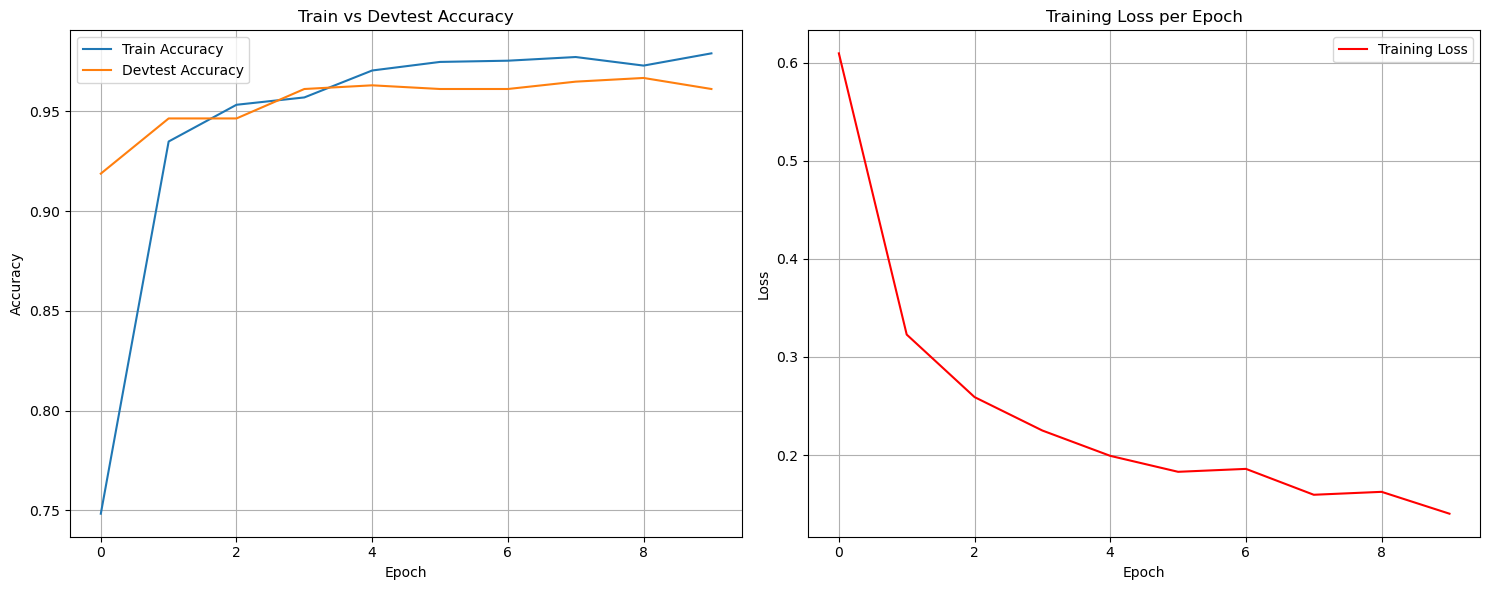

Test accuracy: 0.982


In [38]:
from torchvision import models

# Load pre-trained MobileNet model
mobilenet = models.mobilenet_v2(pretrained=True)

# Freeze all parameters in the base model
for param in mobilenet.parameters():
    param.requires_grad = False

# Get the number of features from the last layer
num_features = mobilenet.classifier[1].in_features

# Replace the classifier with a new one for our 3 classes
mobilenet.classifier = nn.Sequential(
    nn.Dropout(0.2),  # Keep the dropout for regularization
    nn.Linear(num_features, 3)  # Assuming 3 classes as in your original model
)

# Define model, loss function and optimizer
model = mobilenet.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)


# Lists to store accuracy/loss per epoch
train_accuracies = []
devtest_accuracies = []
losses = []

# Set number of epochs
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    print(f"Epoch: {epoch}")

    epoch_accuracies = []
    epoch_losses = []

    # Train on all batches
    for batch in tqdm(train_loader):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        batch_accuracy = accuracy(x, y, model)
        epoch_losses.append(batch_loss)
        epoch_accuracies.extend(batch_accuracy)

    # Evaluate on devtest set
    devtest_accs = []
    for batch in devtest_loader:
        x, y = batch
        devtest_accs.extend(accuracy(x, y, model))

    # Store mean values
    mean_train_acc = np.mean(epoch_accuracies)
    mean_devtest_acc = np.mean(devtest_accs)
    mean_loss = np.mean(epoch_losses)

    train_accuracies.append(mean_train_acc)
    devtest_accuracies.append(mean_devtest_acc)
    losses.append(mean_loss)

    print(f"  Train accuracy: {round(mean_train_acc, 3)} | Devtest accuracy: {round(mean_devtest_acc, 3)} | Loss: {round(mean_loss, 4)}")

# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# First subplot for accuracies
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(devtest_accuracies, label='Devtest Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train vs Devtest Accuracy')
plt.legend()
plt.grid(True)

# Second subplot for losses
plt.subplot(1, 2, 2)
plt.plot(losses, label='Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate on test set after training
test_accs = []
for batch in test_loader:
    x, y = batch
    test_accs.extend(accuracy(x, y, model))
test_accuracy = np.mean(test_accs)
print(f"Test accuracy: {round(test_accuracy, 3)}")